In [1]:
!pip install nilearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 31.0 MB/s eta 0:00:00


In [2]:
import os
from nilearn import plotting
from nilearn import image
from nilearn.image import load_img
import numpy as np
import matplotlib.pyplot as plt
from nilearn import datasets
from nilearn.maskers import NiftiLabelsMasker
from nilearn.connectome import ConnectivityMeasure
from nilearn.regions import connected_label_regions
import nibabel as nib
import pandas as pd
from sklearn import svm
from sklearn import metrics

In [3]:
# importamos la data en csv:
from google.colab import drive
drive.mount('/content/drive') # directorio de todas las carpetas

os.chdir("/content/drive/MyDrive/intento_cosas")
luteo = r'/content/drive/MyDrive/intento_cosas/features_ec_lut.csv'
menstr = r'/content/drive/MyDrive/intento_cosas/features_ec_men.csv'
prolif = r'/content/drive/MyDrive/intento_cosas/features_ec_pro.csv'

Mounted at /content/drive


In [4]:
data_lut = pd.read_csv(luteo, index_col=0)
data_lut = data_lut.sort_values(['file_name'])
data_lut

,cortical_mean_4,cortical_mean_5,cortical_mean_6,cortical_mean_11,cortical_mean_12,cortical_mean_13,cortical_mean_21,cortical_mean_31,cortical_std_4,cortical_std_5,...,subcortical_mean_19,subcortical_mean_20,subcortical_std_4,subcortical_std_5,subcortical_std_9,subcortical_std_10,subcortical_std_15,subcortical_std_16,subcortical_std_19,subcortical_std_20
file_name,,,,,,,,,,,,,,,,,,,,,
ECM_103515__blur_02.nii.gz,0.000271,0.000607,0.000022,1.962715e-03,0.000489,7.835116e-06,0.003330,0.000010,0.0,0.0,...,1.972744e-09,1.160337e-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ECM_103515__blur_03.nii.gz,0.000486,0.000752,0.000245,1.047045e-03,0.001405,9.749581e-06,0.004172,0.001166,0.0,0.0,...,4.198223e-07,2.594061e-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ECM_103515_blur_01.nii.gz,0.000073,0.000064,0.000034,1.053853e-03,0.000551,3.933946e-07,0.003263,0.000098,0.0,0.0,...,5.171169e-09,1.517191e-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ECM_104820__blur_02.nii.gz,0.000206,0.000073,0.000056,4.485805e-05,0.000942,9.188978e-06,0.002314,0.002793,0.0,0.0,...,1.489785e-09,2.298721e-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ECM_104820__blur_03.nii.gz,0.000040,0.000006,0.000035,6.496973e-06,0.000873,3.979251e-07,0.001789,0.003608,0.0,0.0,...,7.207518e-10,1.575449e-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ECM_809252__blur_03.nii.gz,0.000215,0.000032,0.000002,2.286540e-03,0.000313,7.921279e-06,0.001712,0.000010,0.0,0.0,...,2.344237e-11,2.890876e-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ECM_809252_blur_01.nii.gz,0.000008,0.000096,0.000244,2.133681e-06,0.000087,1.884388e-10,0.004183,0.003771,0.0,0.0,...,1.228738e-12,2.583907e-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ECM_822244__blur_02.nii.gz,0.000824,0.000028,0.000003,1.779842e-06,0.000012,5.170223e-08,0.000036,0.000019,0.0,0.0,...,1.689701e-14,1.834367e-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
data_men = pd.read_csv(menstr, index_col=0)
data_men = data_men.sort_values(['file_name'])
data_men

,cortical_mean_4,cortical_mean_5,cortical_mean_6,cortical_mean_11,cortical_mean_12,cortical_mean_13,cortical_mean_21,cortical_mean_31,cortical_std_4,cortical_std_5,...,subcortical_mean_19,subcortical_mean_20,subcortical_std_4,subcortical_std_5,subcortical_std_9,subcortical_std_10,subcortical_std_15,subcortical_std_16,subcortical_std_19,subcortical_std_20
file_name,,,,,,,,,,,,,,,,,,,,,
ECM_114823__blur_02.nii.gz,0.001395,0.002108,0.000638,0.000075,1.064349e-04,2.990143e-08,2.945436e-03,1.891044e-03,0.0,0.0,...,1.340592e-05,1.440795e-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ECM_114823__blur_03.nii.gz,0.000284,0.000448,0.000283,0.000282,2.044446e-04,2.276338e-07,3.068181e-03,2.730954e-03,0.0,0.0,...,2.052405e-06,3.844586e-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ECM_114823_blur_01.nii.gz,0.000456,0.000862,0.000475,0.000449,3.873327e-04,4.172116e-06,1.043253e-03,8.008664e-04,0.0,0.0,...,4.660730e-05,1.564156e-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ECM_117122__blur_02.nii.gz,0.001346,0.000372,0.000510,0.004209,2.526408e-03,7.442908e-08,4.514363e-06,4.026440e-07,0.0,0.0,...,1.318053e-04,4.623612e-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ECM_117122__blur_03.nii.gz,0.000003,0.000118,0.000181,0.000003,1.011248e-04,1.612081e-06,3.196915e-03,8.707414e-03,0.0,0.0,...,4.206556e-09,3.534246e-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ECM_861456__blur_03.nii.gz,0.000013,0.000001,0.000425,0.000058,9.917327e-05,9.617521e-08,3.185237e-03,7.082026e-03,0.0,0.0,...,1.477764e-16,7.308684e-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ECM_861456_blur_01.nii.gz,0.000679,0.000251,0.000248,0.001048,2.547693e-04,1.204367e-03,6.621793e-04,3.955971e-05,0.0,0.0,...,9.805598e-08,1.252409e-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ECM_902242__blur_02.nii.gz,0.006554,0.008348,0.001607,0.000890,4.049039e-08,6.204111e-05,1.913709e-09,1.920248e-14,0.0,0.0,...,3.523546e-16,3.912861e-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
data_pr = pd.read_csv(prolif, index_col=0)
data_pr = data_pr.sort_values(['file_name'])
data_pr

,cortical_mean_4,cortical_mean_5,cortical_mean_6,cortical_mean_11,cortical_mean_12,cortical_mean_13,cortical_mean_21,cortical_mean_31,cortical_std_4,cortical_std_5,...,subcortical_mean_19,subcortical_mean_20,subcortical_std_4,subcortical_std_5,subcortical_std_9,subcortical_std_10,subcortical_std_15,subcortical_std_16,subcortical_std_19,subcortical_std_20
file_name,,,,,,,,,,,,,,,,,,,,,
ECM_101915__blur_02.nii.gz,0.000002,0.000015,0.001523,5.730235e-05,0.000780,7.887227e-12,0.002735,0.005940,0.0,0.0,...,5.684187e-09,2.861216e-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ECM_101915__blur_03.nii.gz,0.000012,0.000015,0.000828,2.545217e-06,0.000680,9.363211e-11,0.002530,0.002050,0.0,0.0,...,1.208300e-13,1.000000e-45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ECM_101915_blur_01.nii.gz,0.000892,0.000132,0.000307,3.514117e-04,0.001696,2.330704e-05,0.001071,0.001688,0.0,0.0,...,5.618091e-08,1.052977e-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ECM_128632__blur_02.nii.gz,0.000024,0.000253,0.001716,2.130292e-05,0.000227,3.903365e-09,0.001580,0.002686,0.0,0.0,...,4.123721e-18,5.726133e-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ECM_128632__blur_03.nii.gz,0.000025,0.000362,0.001973,3.132297e-05,0.000804,1.674043e-06,0.001489,0.004687,0.0,0.0,...,8.140867e-13,1.106044e-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ECM_987983__blur_03.nii.gz,0.000050,0.000372,0.000445,9.591647e-07,0.000048,5.797920e-10,0.003293,0.001684,0.0,0.0,...,1.656910e-11,3.269369e-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ECM_987983_blur_01.nii.gz,0.000700,0.002083,0.000998,3.450482e-06,0.000591,5.615083e-09,0.001666,0.000099,0.0,0.0,...,1.154023e-13,3.305360e-33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ECM_993675__blur_02.nii.gz,0.000008,0.000039,0.000223,5.379377e-06,0.000066,1.725714e-07,0.002581,0.003796,0.0,0.0,...,3.045486e-11,7.038908e-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
from sklearn.model_selection import train_test_split

# 2. Añadir una columna que indique el grupo al que pertenece cada muestra
data_men['group'] = '0'
data_pr['group'] = '1'
data_lut['group'] = '2'

# 2. Definir función para tomar el primer tercio de un DataFrame
mens = 21*3 #int(len(data_men)*0.7)
prlof = 25*3 #int(len(data_pr)*0.7)
lut = 25*3 #int(len(data_lut)*0.7)

# 3. Tomar solo el primer tercio de cada grupo
data_men_train = data_men.iloc[:mens]
data_pr_train = data_pr.iloc[:prlof]
data_lut_train = data_lut.iloc[:lut]

data_men_test = data_men.iloc[mens:]
data_pr_test = data_pr.iloc[prlof:]
data_lut_test = data_lut.iloc[lut:]

df_all = pd.concat([data_men, data_pr, data_lut], ignore_index=True)
X = df_all.drop(columns=['group'])  # Eliminar la columna de grupo para usar solo las features
y = df_all['group']  # Esta será nuestra etiqueta

# 4. Añadir una columna que indique el grupo al que pertenece cada muestra
#data_men['group'] = 'menstrual'
#data_pr['group'] = 'proliferativo'
#data_lut['group'] = 'luteo'

# 5. Concatenar todos los datos en un solo DataFrame
df_all_train = pd.concat([data_men_train, data_pr_train, data_lut_train], ignore_index=True)
df_all_test = pd.concat([data_men_test, data_pr_test, data_lut_test], ignore_index=True)

# 6. Definir las características (X) y la etiqueta/grupo (y)
X_train = df_all_train.drop(columns=['group'])  # Eliminar la columna de grupo para usar solo las features
y_train = df_all_train['group']  # Esta será nuestra etiqueta

X_test = df_all_test.drop(columns=['group'])  # Eliminar la columna de grupo para usar solo las features
y_test = df_all_test['group']  # Esta será nuestra etiqueta

# 8. Ahora tienes tus sets de entrenamiento y testeo con el primer tercio de cada grupo:
print(f"Conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Conjunto de testeo: {X_test.shape[0]} muestras")


Conjunto de entrenamiento: 213 muestras
Conjunto de testeo: 69 muestras


In [8]:
print(X_train, y_train)
print(X_test, y_test)

     cortical_mean_4  cortical_mean_5  cortical_mean_6  cortical_mean_11  \
0           0.001395         0.002108         0.000638      7.476062e-05   
1           0.000284         0.000448         0.000283      2.817449e-04   
2           0.000456         0.000862         0.000475      4.492610e-04   
3           0.001346         0.000372         0.000510      4.208814e-03   
4           0.000003         0.000118         0.000181      3.060955e-06   
..               ...              ...              ...               ...   
208         0.001231         0.000402         0.000008      1.401705e-03   
209         0.001264         0.000624         0.001183      3.397267e-04   
210         0.000436         0.001213         0.000455      1.458666e-05   
211         0.000030         0.000358         0.000367      2.025089e-06   
212         0.000093         0.001020         0.000704      4.893259e-07   

     cortical_mean_12  cortical_mean_13  cortical_mean_21  cortical_mean_31  \
0       

# Falta colocar el label de la data, no parece haber funcionado lo anterior para el gráfico siguiente:

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # escala los datos para tener una media 0 y desviación estándar 1
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled)

[[ 1.09096741  1.43046455  0.0024274  ...  0.          0.
   0.        ]
 [-0.07618294 -0.05593122 -0.41332258 ...  0.          0.
   0.        ]
 [ 0.10402739  0.31523318 -0.18903203 ...  0.          0.
   0.        ]
 ...
 [ 0.08335758  0.62914867 -0.21180781 ...  0.          0.
   0.        ]
 [-0.34326326 -0.13665783 -0.31568847 ...  0.          0.
   0.        ]
 [-0.27721585  0.45638217  0.07984023 ...  0.          0.
   0.        ]]


In [10]:
import numpy as np

# Asegúrate de que los índices de y_train y X_train_scaled coincidan
y_train = y_train.reset_index(drop=True)

# Escalar los datos de X_train
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Convertir X_train_scaled a DataFrame para facilitar la manipulación de índices
X_train_scaled = pd.DataFrame(X_train_scaled)
print(X_train_scaled)


           0         1         2         3         4         5         6   \
0    1.090967  1.430465  0.002427 -0.521655 -0.582009 -0.214989  0.676133   
1   -0.076183 -0.055931 -0.413323 -0.275719 -0.481904 -0.214675  0.767542   
2    0.104027  0.315233 -0.189032 -0.076679 -0.295105 -0.208428 -0.740428   
3    1.039405 -0.124131 -0.147417  4.390360  1.889710 -0.214918 -1.513980   
4   -0.371924 -0.351157 -0.533616 -0.606847 -0.587433 -0.212483  0.863410   
..        ...       ...       ...       ...       ...       ...       ...   
208  0.919013 -0.096683 -0.736468  1.054999 -0.501777 -0.203888  0.334721   
209  0.953649  0.101530  0.641687 -0.206826  0.794071 -0.032529 -0.201636   
210  0.083358  0.629149 -0.211808 -0.593152 -0.560539 -0.214976  0.841990   
211 -0.343263 -0.136658 -0.315688 -0.608078 -0.652440 -0.215033  0.528236   
212 -0.277216  0.456382  0.079840 -0.609902 -0.608697 -0.215036 -0.130056   

           7    8    9   ...        22        23   24   25   26   27   28  

In [11]:
# Definir los índices correspondientes a cada grupo
grupo_1_indices = np.arange(0, mens) #np.arange(0, 51)   # Primer grupo (y_train = 0)
grupo_2_indices = np.arange(mens, mens +prlof) #np.arange(51, 132) # Segundo grupo (y_train = 1)
grupo_3_indices = np.arange(mens + prlof, mens + prlof + lut) #np.arange(132, 196) # Tercer grupo (y_train = 2)

# Extraer los subconjuntos de X_train_scaled correspondientes a cada grupo
grupo_1 = X_train_scaled.iloc[grupo_1_indices]
grupo_2 = X_train_scaled.iloc[grupo_2_indices]
grupo_3 = X_train_scaled.iloc[grupo_3_indices]

# Imprimir los grupos
print("Grupo 1 (y_train = 0):")
print(grupo_1)

print("\nGrupo 2 (y_train = 1):")
print(grupo_2)

print("\nGrupo 3 (y_train = 2):")
print(grupo_3)


Grupo 1 (y_train = 0):
          0         1         2         3         4         5         6   \
0   1.090967  1.430465  0.002427 -0.521655 -0.582009 -0.214989  0.676133   
1  -0.076183 -0.055931 -0.413323 -0.275719 -0.481904 -0.214675  0.767542   
2   0.104027  0.315233 -0.189032 -0.076679 -0.295105 -0.208428 -0.740428   
3   1.039405 -0.124131 -0.147417  4.390360  1.889710 -0.214918 -1.513980   
4  -0.371924 -0.351157 -0.533616 -0.606847 -0.587433 -0.212483  0.863410   
..       ...       ...       ...       ...       ...       ...       ...   
58  0.575874  0.049850 -0.731399  1.832804 -0.258770 -0.209623  1.094639   
59 -0.261169 -0.230334 -0.606403 -0.125364 -0.446971 -0.212392 -1.006711   
60 -0.160500 -0.394738 -0.720373  0.651702 -0.505267 -0.177958  0.255267   
61  0.245495 -0.328055 -0.734821  1.427102 -0.544886 -0.171522  0.567062   
62 -0.298084 -0.340695 -0.564352 -0.347435  0.177401 -0.211993 -0.606936   

          7    8    9   ...        22        23   24   25   26  

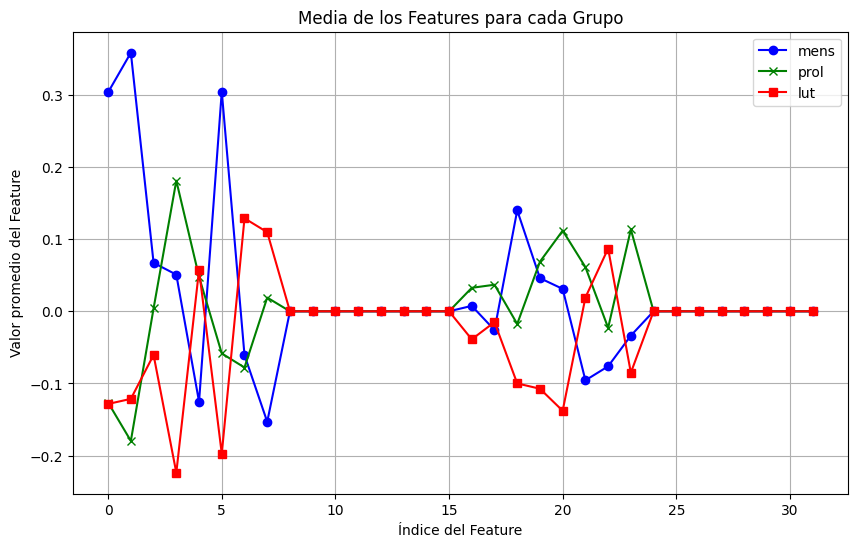

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

media_grupo_1 = np.mean(grupo_1, axis=0)
media_grupo_2 = np.mean(grupo_2, axis=0)
media_grupo_3 = np.mean(grupo_3, axis=0)

# Gráfica de las medias de cada feature para los 3 grupos
plt.figure(figsize=(10, 6))

# Graficar las medias de los features para cada grupo
plt.plot(media_grupo_1, marker='o', label='mens', color='blue')
plt.plot(media_grupo_2, marker='x', label='prol', color='green')
plt.plot(media_grupo_3, marker='s', label='lut', color='red')

# Configuración de la gráfica
plt.xlabel('Índice del Feature')
plt.ylabel('Valor promedio del Feature')
plt.title('Media de los Features para cada Grupo')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()



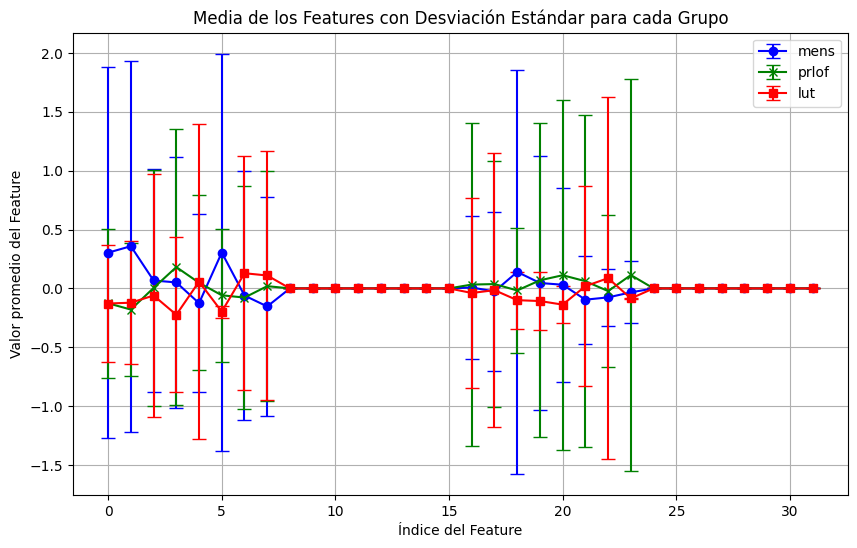

In [13]:
import numpy as np
import matplotlib.pyplot as plt

std_grupo_1 = np.std(grupo_1, axis=0)
std_grupo_2 = np.std(grupo_2, axis=0)
std_grupo_3 = np.std(grupo_3, axis=0)

# Gráfica de las medias de cada feature para los 3 grupos con barras de error
plt.figure(figsize=(10, 6))

# Graficar las medias de los features para cada grupo con barras de error (desviación estándar)
plt.errorbar(range(len(media_grupo_1)), media_grupo_1, yerr=std_grupo_1, marker='o', label='mens', color='blue', capsize=5)
plt.errorbar(range(len(media_grupo_2)), media_grupo_2, yerr=std_grupo_2, marker='x', label='prlof', color='green', capsize=5)
plt.errorbar(range(len(media_grupo_3)), media_grupo_3, yerr=std_grupo_3, marker='s', label='lut', color='red', capsize=5)

# Configuración de la gráfica
plt.xlabel('Índice del Feature')
plt.ylabel('Valor promedio del Feature')
plt.title('Media de los Features con Desviación Estándar para cada Grupo')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()


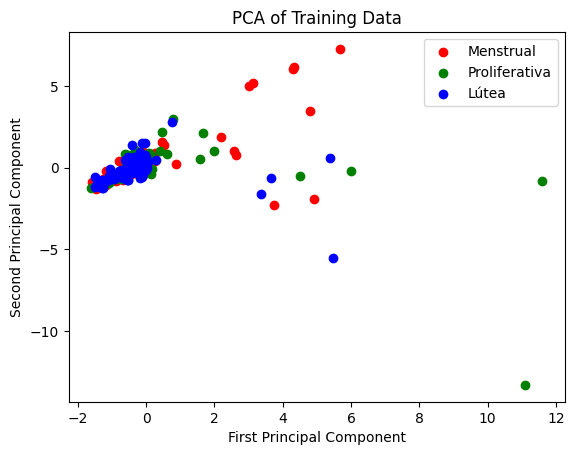

In [14]:
# graficamos nuestra data a ver cómo se comporta

import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

# Configurar los colores y etiquetas para cada grupo
colors = ['r', 'g', 'b']  # Elige los colores que representarán a los grupos
labels = ['Menstrual', 'Proliferativa', 'Lútea']  # Nombres de los grupos
unique_labels = np.unique(y_train)  # Obtener los grupos únicos

# Graficar y agregar la leyenda
for i, label in enumerate(unique_labels):
    plt.scatter(X_pca[y_train == label, 0], X_pca[y_train == label, 1],
                color=colors[i], label=labels[i])

plt.title('PCA of Training Data')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.show()


In [15]:
# este es para buscar los mejores parámetros para el svm.

from sklearn.model_selection import GridSearchCV
from sklearn import svm

# Definir el grid de hiperparámetros
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'linear']
}

# Inicializar el modelo GridSearchCV con SVC
grid = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=2)

# Entrenar el modelo con los datos originales (X_train_scaled)
grid.fit(X_train_scaled, y_train)

# Entrenar el modelo con los datos PCA (X_pca)
grid_pca = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=2)
grid_pca.fit(X_pca, y_train)

# Mostrar los mejores parámetros y puntajes para cada caso
print("Mejores hiperparámetros (X_train_scaled):", grid.best_params_)
print("Mejor puntaje (X_train_scaled):", grid.best_score_)

print("Mejores hiperparámetros (X_pca):", grid_pca.best_params_)
print("Mejor puntaje (X_pca):", grid_pca.best_score_)



Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, 

In [16]:
classifier = svm.SVC() # mejor version:
# classifier = svm.SVC(kernel='rbf', gamma=0.1, C=100)
# classifier = svm.SVC(kernel='poly', degree=3, C=0.01)
# classifier = svm.SVC(kernel='linear')

classifier.fit(X_train_scaled, y_train)
y_predict = classifier.predict(X_test_scaled)

In [17]:
metrics.accuracy_score(y_test, y_predict)

0.43478260869565216

In [18]:
y_predict2 = grid.predict(X_test_scaled)

accuracy = metrics.accuracy_score(y_test, y_predict2)
print(f"Accuracy: {accuracy}")

Accuracy: 0.42028985507246375


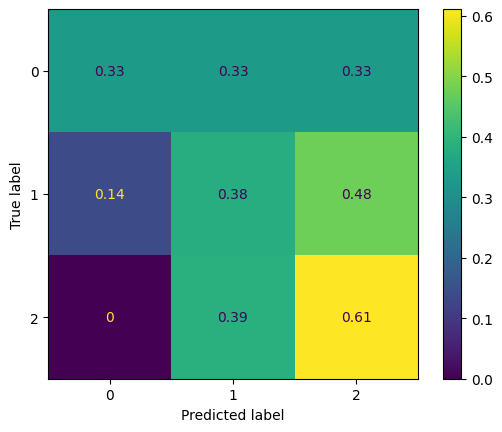

In [19]:
conf_mat = metrics.confusion_matrix(y_test, y_predict, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

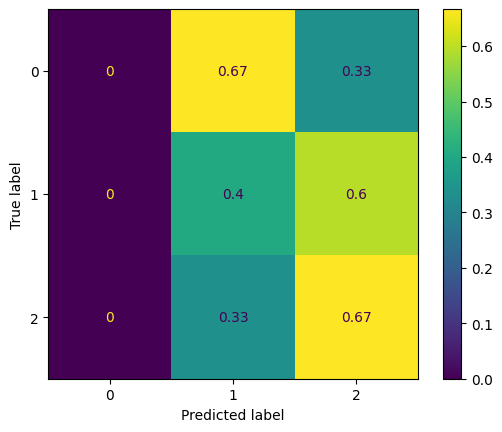

In [20]:
conf_mat = metrics.confusion_matrix(y_test, y_predict2, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

In [21]:
classif = svm.SVC()
classif.fit(X_pca, y_train)

X_test_pca = pca.transform(X_test_scaled)  # Asegúrate de transformar tu conjunto de prueba

y_pred = classif.predict(X_test_pca)  # Predecir con el modelo entrenado en los datos transformados

accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.36231884057971014


In [22]:
y_pred2 = grid_pca.predict(X_test_pca)
accuracy = metrics.accuracy_score(y_test, y_pred2)
print(f"Accuracy: {accuracy}")

Accuracy: 0.391304347826087


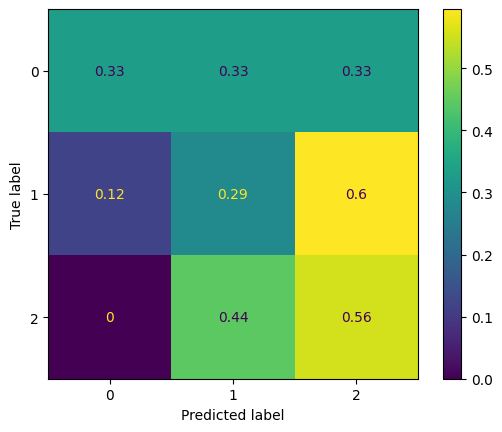

In [23]:
conf_mat = metrics.confusion_matrix(y_test, y_pred, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

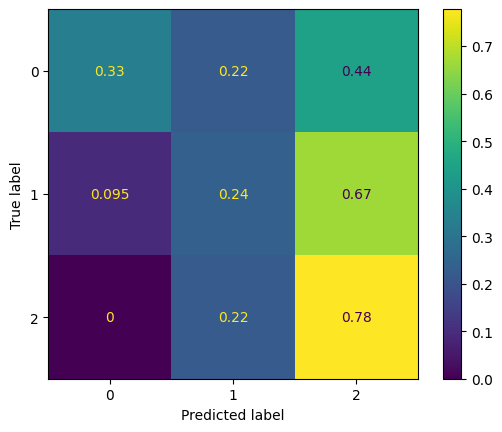

In [24]:
conf_mat = metrics.confusion_matrix(y_test, y_pred2, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

Ojo, puede que cross validation esté muy sobreajustado por estar usando a los mismos sujetos, quizá es mejor hacer los folds a mano

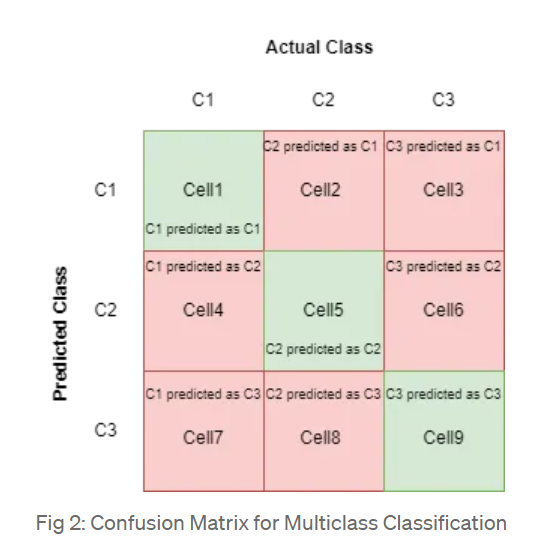

In [25]:
# Para hacer cross-validation:
from sklearn.model_selection import GroupKFold
import numpy as np

# Número total de grupos
n_groups = X.shape[0]/3

# Crear el array repitiendo cada número 3 veces
groups = np.repeat(np.arange(n_groups), 3) # ponemos aquí nuestros 200 sujetos

#
# Para que esto funcione debo definir X e y al inicio  !!!!!!!!!!!!!!!
#

# Definir GroupKFold
gkf = GroupKFold(n_splits=3) # número de folds

In [26]:
print(X, y)

     cortical_mean_4  cortical_mean_5  cortical_mean_6  cortical_mean_11  \
0           0.001395         0.002108         0.000638      7.476062e-05   
1           0.000284         0.000448         0.000283      2.817449e-04   
2           0.000456         0.000862         0.000475      4.492610e-04   
3           0.001346         0.000372         0.000510      4.208814e-03   
4           0.000003         0.000118         0.000181      3.060955e-06   
..               ...              ...              ...               ...   
277         0.000215         0.000032         0.000002      2.286540e-03   
278         0.000008         0.000096         0.000244      2.133681e-06   
279         0.000824         0.000028         0.000003      1.779842e-06   
280         0.000376         0.000017         0.000002      2.481502e-07   
281         0.000499         0.000652         0.000243      1.846243e-04   

     cortical_mean_12  cortical_mean_13  cortical_mean_21  cortical_mean_31  \
0       

              precision    recall  f1-score   support

           0       0.50      0.33      0.40         9
           1       0.68      0.93      0.79        42
           2       0.67      0.22      0.33        18

    accuracy                           0.67        69
   macro avg       0.62      0.49      0.51        69
weighted avg       0.66      0.67      0.62        69

              precision    recall  f1-score   support

           0       0.44      0.44      0.44         9
           1       0.68      0.93      0.79        42
           2       0.67      0.11      0.19        18

    accuracy                           0.65        69
   macro avg       0.60      0.49      0.47        69
weighted avg       0.65      0.65      0.59        69

              precision    recall  f1-score   support

           0       0.67      0.44      0.53         9
           1       0.67      0.67      0.67        42
           2       0.29      0.33      0.31        18

    accuracy        

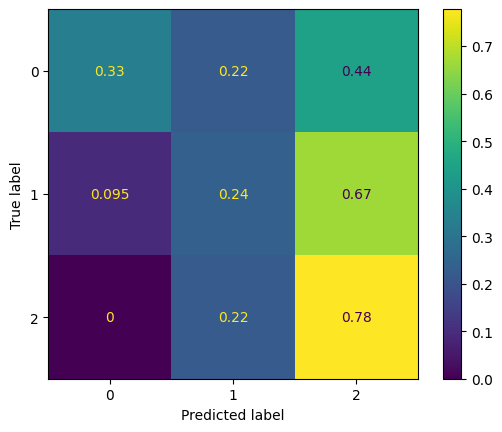

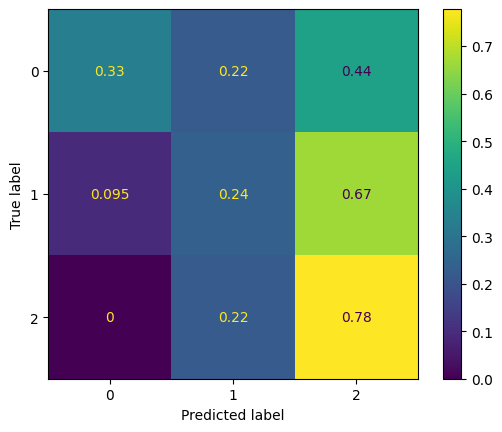

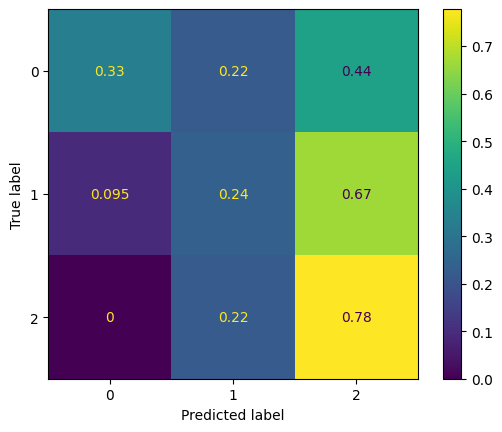

In [27]:
from sklearn.metrics import classification_report

# Iterar sobre los splits
for train_idx, test_idx in gkf.split(X, y, groups):
    # Dividir los datos de entrenamiento y prueba
    X_train2, X_test2 = X.loc[train_idx], X.loc[test_idx]
    y_train2, y_test2 = y.loc[train_idx], y.loc[test_idx]
    classif.fit(X_train2, y_train2)
    y_pred = classif.predict(X_test)
    print(classification_report(y_test, y_pred))
    conf_mat = metrics.confusion_matrix(y_test, y_pred2, normalize="true")
    plot = metrics.ConfusionMatrixDisplay(conf_mat)
    plot.plot()

In [28]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
scores

array([0.40350877, 0.40350877, 0.42857143, 0.42857143, 0.41071429])

In [29]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.41 accuracy with a standard deviation of 0.01


# Random Forest:

Probaremos ahora con otro modelo

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
y_pred = random_forest.predict(X_test)

# Imprimir los resultados de las métricas
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.3333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.18      0.44      0.26         9
           1       0.56      0.24      0.33        42
           2       0.31      0.50      0.38        18

    accuracy                           0.33        69
   macro avg       0.35      0.39      0.32        69
weighted avg       0.44      0.33      0.34        69



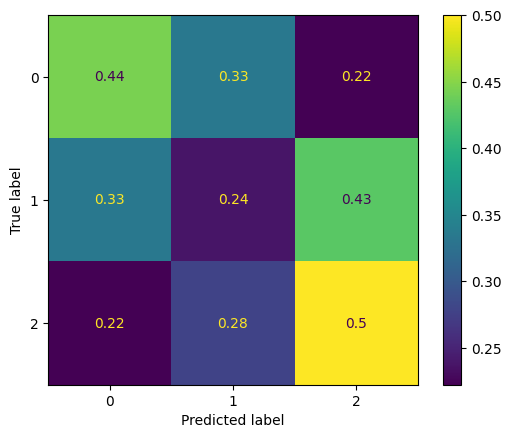

In [32]:
conf_mat = metrics.confusion_matrix(y_test, y_pred, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

In [33]:
# Obtener las importancias de cada feature
importances = random_forest.feature_importances_

# Crear un DataFrame para visualizar mejor las importancias
feature_names = X.columns  # Asumiendo que X es un DataFrame con los nombres de los ROIs
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Ordenar de mayor a menor importancia
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Imprimir las características más importantes
print(importances_df.head(10))  # Las 10 características más importantes

                Feature  Importance
6      cortical_mean_21    0.115523
3      cortical_mean_11    0.113167
7      cortical_mean_31    0.111655
4      cortical_mean_12    0.109318
1       cortical_mean_5    0.108375
2       cortical_mean_6    0.099555
0       cortical_mean_4    0.093382
5      cortical_mean_13    0.056254
22  subcortical_mean_19    0.032024
18   subcortical_mean_9    0.030519


In [34]:
pip install tensorflow

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Codificar las etiquetas (labels)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Convertir las etiquetas a one-hot encoding (ya que son 3 clases)
y_onehot = to_categorical(y_encoded)

# Dividir en sets de entrenamiento y prueba (X_train, X_test, y_train, y_test)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# Estandarizar los datos (normalizar los features)
scaler = StandardScaler()
X_train_scaled1 = scaler.fit_transform(X_train1)
X_test_scaled1 = scaler.transform(X_test1)

# Crear el modelo de red neuronal
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled1.shape[1], activation='relu'))  # Capa de entrada
model.add(Dense(32, activation='relu'))  # Capa oculta
model.add(Dense(3, activation='softmax'))  # Capa de salida (tres clases)

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train_scaled1, y_train1, epochs=50, batch_size=16, validation_data=(X_test_scaled1, y_test1))

# Evaluar el modelo en el set de prueba
loss, accuracy = model.evaluate(X_test_scaled1, y_test1)
print(f"Precisión del modelo en el set de prueba: {accuracy * 100:.2f}%")

# Hacer predicciones con el modelo entrenado
predicciones = model.predict(X_test_scaled)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.4423 - loss: 1.1039 - val_accuracy: 0.3684 - val_loss: 1.1184
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4038 - loss: 1.0799 - val_accuracy: 0.3860 - val_loss: 1.0961
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4993 - loss: 1.0385 - val_accuracy: 0.4035 - val_loss: 1.0824
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5310 - loss: 1.0013 - val_accuracy: 0.4035 - val_loss: 1.0744
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4781 - loss: 1.0258 - val_accuracy: 0.3860 - val_loss: 1.0691
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5087 - loss: 0.9809 - val_accuracy: 0.3684 - val_loss: 1.0664
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5360 - loss: 0.9557 - val_accuracy: 0.3860 - val_loss: 1.0606
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5268 - loss: 0.9403 - val_accuracy: 0.3684 - val_lo

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Matriz de confusión:
[[ 3 10  1]
 [ 2 13  5]
 [ 3 15  5]]


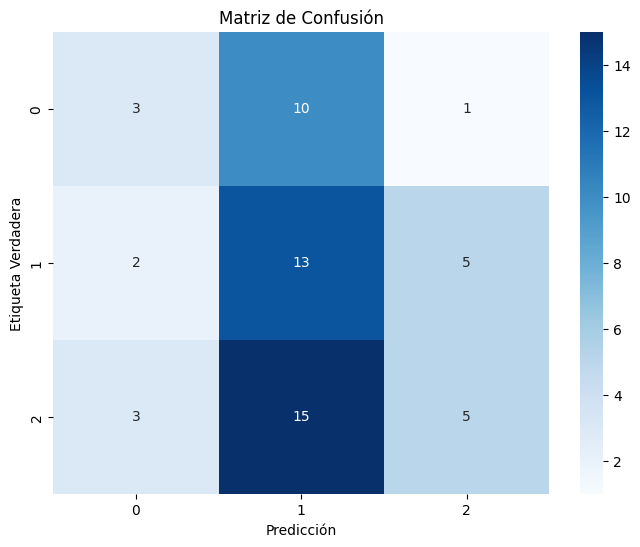

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Hacer predicciones en el set de prueba
predicciones = model.predict(X_test_scaled1)

# Convertir las predicciones de one-hot encoding a clases
y_pred_classes = np.argmax(predicciones, axis=1)

# Convertir las etiquetas verdaderas (y_test) de one-hot encoding a clases
y_true_classes = np.argmax(y_test1, axis=1)

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(conf_matrix)

# Visualizar la matriz de confusión usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')
plt.show()



In [37]:
# Codificar las etiquetas (labels)
encoder = LabelEncoder()
y_encoded_test = encoder.fit_transform(y_test)
y_encoded_train = encoder.fit_transform(y_train)

# Estandarizar los datos (normalizar los features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_onehot_test = to_categorical(y_encoded_test)
y_onehot_train = to_categorical(y_encoded_train)

# Crear el modelo de red neuronal
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled1.shape[1], activation='relu'))  # Capa de entrada
model.add(Dense(32, activation='relu'))  # Capa oculta
model.add(Dense(3, activation='softmax'))  # Capa de salida (tres clases)

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train_scaled, y_onehot_train, epochs=50, batch_size=16, validation_data=(X_test_scaled, y_onehot_test))

# Evaluar el modelo en el set de prueba
loss, accuracy = model.evaluate(X_test_scaled, y_onehot_test)
print(f"Precisión del modelo en el set de prueba: {accuracy * 100:.2f}%")

# Hacer predicciones con el modelo entrenado
predicciones = model.predict(X_test_scaled)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 0.3936 - loss: 1.1439 - val_accuracy: 0.4348 - val_loss: 1.0903
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4545 - loss: 1.0959 - val_accuracy: 0.4493 - val_loss: 1.0348
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5089 - loss: 1.0473 - val_accuracy: 0.4348 - val_loss: 1.0362
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5688 - loss: 1.0039 - val_accuracy: 0.4348 - val_loss: 1.0404
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5844 - loss: 0.9716 - val_accuracy: 0.4203 - val_loss: 1.0535
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5624 - loss: 0.9714 - val_accuracy: 0.4638 - val_loss: 1.0478
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6011 - loss: 0.9588 - val_accuracy: 0.4493 - val_loss: 1.0637
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6023 - loss: 0.9494 - val_accuracy: 0.4348 - val_loss: 1.07

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Matriz de confusión:
[[ 4  2  3]
 [14  9 19]
 [ 3  6  9]]


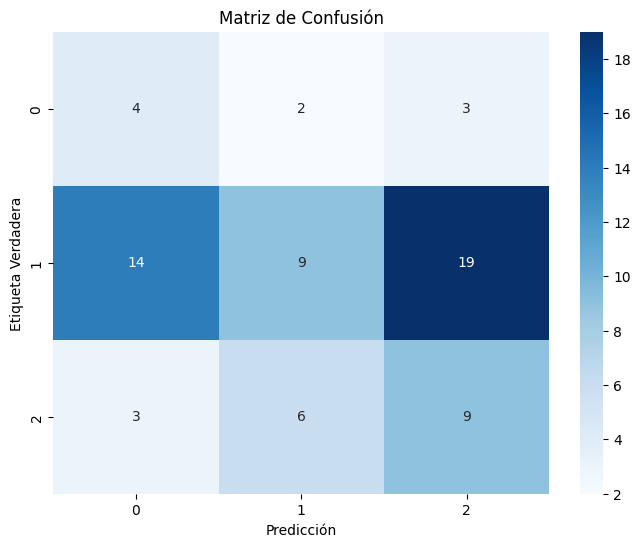

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Hacer predicciones en el set de prueba
predicciones = model.predict(X_test_scaled)

# Convertir las predicciones de one-hot encoding a clases
y_pred_classes = np.argmax(predicciones, axis=1)

# Convertir las etiquetas verdaderas (y_test) de one-hot encoding a clases
y_true_classes = np.argmax(y_onehot_test, axis=1)

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(conf_matrix)

# Visualizar la matriz de confusión usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')
plt.show()


In [39]:
men = 20*3
prlof = 20*3 #int(len(data_pr)*0.7)
lut = 20*3 #int(len(data_lut)*0.7)

# 3. Tomar solo el primer tercio de cada grupo
data_men_train2 = data_men.iloc[:men]
data_pro_train2 = data_pr.iloc[:prlof]
data_lut_train2 = data_lut.iloc[:lut]

data_men_test2 = data_men.iloc[men:]
data_pro_test2 = data_pr.iloc[prlof:]
data_lut_test2 = data_lut.iloc[lut:]

data_pro_train2 = data_pro_train2.drop(columns=['group'])
data_lut_train2 = data_lut_train2.drop(columns=['group'])
data_pro_train2['group'] = '0'
data_lut_train2['group'] = '1'

data_pro_test2 = data_pro_test2.drop(columns=['group'])
data_lut_test2 = data_lut_test2.drop(columns=['group'])
data_pro_test2['group'] = '0'
data_lut_test2['group'] = '1'

# 5. Concatenar todos los datos en un solo DataFrame
df_all_train2 = pd.concat([data_men_train2, data_pro_train2, data_lut_train2], ignore_index=True)
df_all_test2 = pd.concat([data_men_test2, data_pro_test2, data_lut_test2], ignore_index=True)

# 6. Definir las características (X) y la etiqueta/grupo (y)
X_train2 = df_all_train2.drop(columns=['group'])  # Eliminar la columna de grupo para usar solo las features
y_train2 = df_all_train2['group']  # Esta será nuestra etiqueta


X_test2 = df_all_test2.drop(columns=['group'])  # Eliminar la columna de grupo para usar solo las features
y_test2 = df_all_test2['group']  # Esta será nuestra etiqueta



In [40]:
import numpy as np

# Asegúrate de que los índices de y_train y X_train_scaled coincidan
y_train2 = y_train2.reset_index(drop=True)

# Escalar los datos de X_train
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled2 = scaler.fit_transform(X_train2)

# Convertir X_train_scaled a DataFrame para facilitar la manipulación de índices
X_train_scaled2 = pd.DataFrame(X_train_scaled2)
X_test_scaled2 = scaler.transform(X_test2)


In [41]:
classifier = svm.SVC() # mejor version:
# classifier = svm.SVC(kernel='rbf', gamma=0.1, C=100)
# classifier = svm.SVC(kernel='poly', degree=3, C=0.01)
# classifier = svm.SVC(kernel='linear')

classifier.fit(X_train_scaled2, y_train2)
y_predict2 = classifier.predict(X_test_scaled2)

In [42]:
metrics.accuracy_score(y_test2, y_predict2)

0.6862745098039216

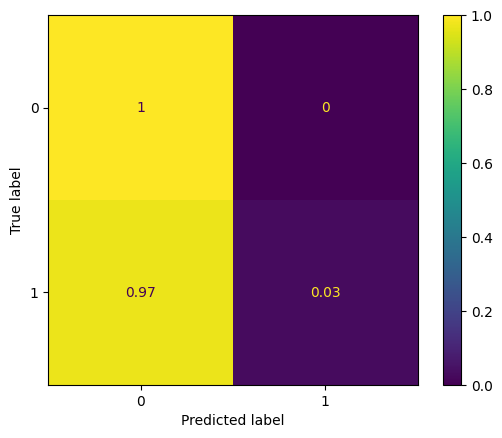

In [43]:
conf_mat = metrics.confusion_matrix(y_test2, y_predict2, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train2, y_train2)

RandomForestClassifier(random_state=42)

In [45]:
y_pred2 = random_forest.predict(X_test2)

# Imprimir los resultados de las métricas
print("Accuracy:", accuracy_score(y_test2, y_pred2))
print("Classification Report:\n", classification_report(y_test2, y_pred2))

Accuracy: 0.6176470588235294
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.81      0.74        69
           1       0.35      0.21      0.26        33

    accuracy                           0.62       102
   macro avg       0.52      0.51      0.50       102
weighted avg       0.58      0.62      0.59       102



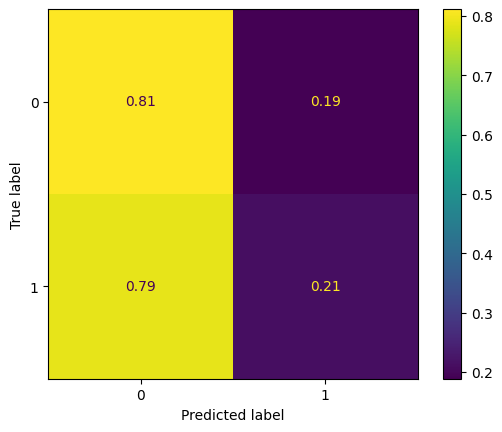

In [46]:
conf_mat = metrics.confusion_matrix(y_test2, y_pred2, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

In [47]:
# Codificar las etiquetas (labels)
encoder = LabelEncoder()
y_encoded_test2 = encoder.fit_transform(y_test2)
y_encoded_train2 = encoder.fit_transform(y_train2)

# Estandarizar los datos (normalizar los features)
scaler = StandardScaler()
X_train_scaled2 = scaler.fit_transform(X_train2)
X_test_scaled2 = scaler.transform(X_test2)

y_onehot_test2 = to_categorical(y_encoded_test2)
y_onehot_train2 = to_categorical(y_encoded_train2)

print(y_onehot_test2)
print(y_onehot_train2)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]


In [48]:

# Crear el modelo de red neuronal
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled2.shape[1], activation='relu'))  # Capa de entrada
model.add(Dense(32, activation='relu'))  # Capa oculta
model.add(Dense(2, activation='softmax'))  # Capa de salida (tres clases)

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train_scaled2, y_onehot_train2, epochs=50, batch_size=16, validation_data=(X_test_scaled2, y_onehot_test2))

# Evaluar el modelo en el set de prueba
loss, accuracy = model.evaluate(X_test_scaled2, y_onehot_test2)
print(f"Precisión del modelo en el set de prueba: {accuracy * 100:.2f}%")

# Hacer predicciones con el modelo entrenado
predicciones = model.predict(X_test_scaled2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.6529 - loss: 0.6713 - val_accuracy: 0.6765 - val_loss: 0.7189
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6776 - loss: 0.6539 - val_accuracy: 0.6765 - val_loss: 0.7050
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6809 - loss: 0.5970 - val_accuracy: 0.6765 - val_loss: 0.6895
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7046 - loss: 0.5635 - val_accuracy: 0.6765 - val_loss: 0.6857
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6441 - loss: 0.5836 - val_accuracy: 0.6667 - val_loss: 0.6826
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6816 - loss: 0.5826 - val_accuracy: 0.6667 - val_loss: 0.6921
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7054 - loss: 0.5585 - val_accuracy: 0.6569 - val_loss: 0.7063
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6965 - loss: 0.5426 - val_accuracy: 0.6569 - val

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Matriz de confusión:
[[49 20]
 [24  9]]


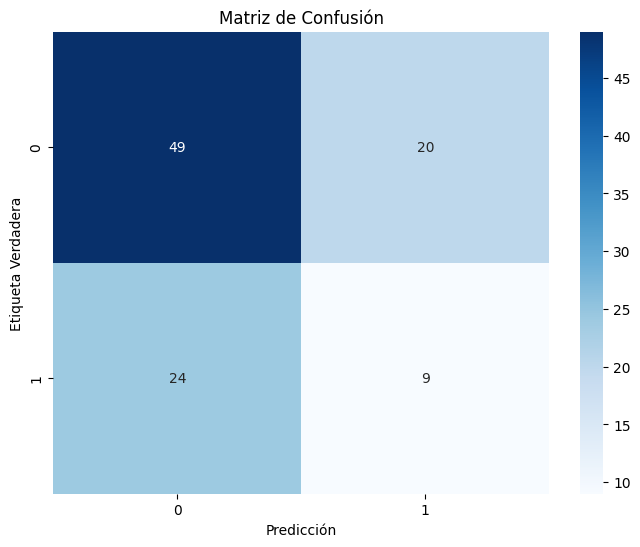

In [49]:
# Hacer predicciones en el set de prueba
predicciones = model.predict(X_test_scaled2)

# Convertir las predicciones de one-hot encoding a clases
y_pred_classes = np.argmax(predicciones, axis=1)

# Convertir las etiquetas verdaderas (y_test) de one-hot encoding a clases
y_true_classes = np.argmax(y_onehot_test2, axis=1)

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(conf_matrix)

# Visualizar la matriz de confusión usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')
plt.show()